# Estandarización, normalización y blanqueo de la base de datos "iris" de scikit-learn.

"iris" es una base de datos supervisados que contiene información de 150 flores de iris. En concreto, para cada flor de iris se tienen 4 atributos morfologicos: la longitud y anchura de los pétalos y los sépalos (en cm). Las flores de iris pertenecen a 3 especies diferentes.

### Importa modulos

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.covariance import empirical_covariance
from sklearn import preprocessing 
from sklearn import decomposition 

### Importa la base de datos de scikit-learn y almacena los datos en la matriz $\mathbf{X}$ y en el vector $\mathbf{y}$ 

In [2]:
from sklearn import datasets 
diabetes = datasets.load_iris()
X = diabetes.data
y = diabetes.target

### Almacenamiento de los datos
La matriz $\mathbf{X}$ contiene $N$ datos de dimensión $d$, y el vector $\mathbf{y}$ contiene el valor de la variable objetivo para cada dato. La matriz $\mathbf{X}$ es de tamaño $N \times d$ y el vector $\mathbf{y}$ es de tamaño $N \times 1$. Por tanto, cada dato es un vector (fila) con $d$ atributos.

In [3]:
[N,d]=X.shape
print('No. de ejemplos/datos/instancias:',N)
print('No. atributos/caracteristicas/features:',d)
print('No. de clases:',len(np.unique(y)))
clases=np.unique(y)
print('Clases:',clases)

No. de ejemplos/datos/instancias: 150
No. atributos/caracteristicas/features: 4
No. de clases: 3
Clases: [0 1 2]


### Valores máximos, mínimos, medios y varianzas de los atributos originales

In [4]:
maximos=X.max(axis=0)
minimos=X.min(axis=0)
medias=X.mean(axis=0)
varianzas=X.var(axis=0)
print('Atributos   Minimos  Maximos  Medias  Varianzas')
for j in range(0,d):
    print('    %d      %3.4f   %3.4f   %3.4f   %3.4f' % (j,minimos[j], maximos[j],medias[j],varianzas[j]))

Atributos   Minimos  Maximos  Medias  Varianzas
    0      4.3000   7.9000   5.8433   0.6811
    1      2.0000   4.4000   3.0540   0.1868
    2      1.0000   6.9000   3.7587   3.0924
    3      0.1000   2.5000   1.1987   0.5785


### Matriz de covarianza de los datos originales

In [5]:
C_X=empirical_covariance(X)
print(np.array_str(C_X, precision=2))

[[ 0.68 -0.04  1.27  0.51]
 [-0.04  0.19 -0.32 -0.12]
 [ 1.27 -0.32  3.09  1.29]
 [ 0.51 -0.12  1.29  0.58]]


## Estandarización

In [6]:
estandariza=preprocessing.StandardScaler().fit(X)
print('Parametros para estandarizar las medias y varianzas:')
for j in range(0,d):
    print('%3.4f   %3.4f' % (estandariza.mean_[j], estandariza.scale_[j])) 

Xe=estandariza.transform(X) # Base de datos estandarizada

Parametros para estandarizar las medias y varianzas:
5.8433   0.8253
3.0540   0.4321
3.7587   1.7585
1.1987   0.7606


### Valores máximos, mínimos, medios y varianzas de los atributos después de estandarizar

In [7]:
maximos=Xe.max(axis=0)
minimos=Xe.min(axis=0)
medias=Xe.mean(axis=0)
varianzas=Xe.var(axis=0)
print('Minimos, Maximos,  Medias,  Varianzas')
for j in range(0,d):
    print('%3.4f   %3.4f   %3.4f   %3.4f' % (minimos[j], maximos[j],medias[j],varianzas[j])) 

Minimos, Maximos,  Medias,  Varianzas
-1.8700   2.4920   -0.0000   1.0000
-2.4390   3.1147   -0.0000   1.0000
-1.5687   1.7863   -0.0000   1.0000
-1.4444   1.7109   -0.0000   1.0000


### Matriz de covarianza de los datos estandarizados

In [8]:
C_Xe=empirical_covariance(Xe)
print(np.array_str(C_Xe, precision=2))

[[ 1.   -0.11  0.87  0.82]
 [-0.11  1.   -0.42 -0.36]
 [ 0.87 -0.42  1.    0.96]
 [ 0.82 -0.36  0.96  1.  ]]


## Normalización de los datos

In [9]:
rango=[0,1]
normaliza=preprocessing.MinMaxScaler(rango).fit(X)
print('Parametros para normalizar:')
for j in range(0,d):
    print('%3.4f   %3.4f' % (normaliza.min_[j], normaliza.scale_[j])) 

Xn=normaliza.transform(X) # Base de datos normalizada

Parametros para normalizar:
-1.1944   0.2778
-0.8333   0.4167
-0.1695   0.1695
-0.0417   0.4167


### Valores máximos, mínimos, medios y varianzas de los atributos después de normalizar

In [10]:
maximos=Xn.max(axis=0)
minimos=Xn.min(axis=0)
medias=Xn.mean(axis=0)
varianzas=Xn.var(axis=0)
print('Minimos, Maximos,  Medias,  Varianzas')
for j in range(0,d):
    print('%3.4f   %3.4f   %3.4f   %3.4f' % (minimos[j], maximos[j],medias[j],varianzas[j])) 

Minimos, Maximos,  Medias,  Varianzas
0.0000   1.0000   0.4287   0.0526
0.0000   1.0000   0.4392   0.0324
0.0000   1.0000   0.4676   0.0888
0.0000   1.0000   0.4578   0.1004


### Matriz de covarianza de los datos normalizados

In [11]:
C_Xn=empirical_covariance(Xn)
print(np.array_str(C_Xn, precision=2))

[[ 0.05 -0.    0.06  0.06]
 [-0.    0.03 -0.02 -0.02]
 [ 0.06 -0.02  0.09  0.09]
 [ 0.06 -0.02  0.09  0.1 ]]


## Blanqueado de los datos

In [12]:
pca = decomposition.PCA(whiten=True) 
pca.fit(X)
Xb=pca.transform(X) # proyecta los datos en el nuevo espacio

### Matriz de covarianza de los datos blanqueados

In [13]:
C_Xb=empirical_covariance(Xb)
print(np.array_str(C_Xb, precision=2))

[[  9.93e-01   9.58e-16   5.18e-16  -2.95e-16]
 [  9.58e-16   9.93e-01  -6.67e-16   4.80e-16]
 [  5.18e-16  -6.67e-16   9.93e-01   4.34e-16]
 [ -2.95e-16   4.80e-16   4.34e-16   9.93e-01]]


### Valores máximos, mínimos, medios y varianzas de los atributos después de blanquear

In [14]:
maximos=Xb.max(axis=0)
minimos=Xb.min(axis=0)
medias=Xb.mean(axis=0)
varianzas=Xb.var(axis=0)
print('Minimos, Maximos,  Medias,  Varianzas')
for j in range(0,d):
    print('%3.4f   %3.4f   %3.4f   %3.4f' % (minimos[j], maximos[j],medias[j],varianzas[j])) 

Minimos, Maximos,  Medias,  Varianzas
-1.5691   1.8462   -0.0000   0.9933
-2.5651   2.7846   -0.0000   0.9933
-2.4693   2.7066   -0.0000   0.9933
-3.2719   3.2756   0.0000   0.9933


### Histograma de un atributo después de estadarizar los datos

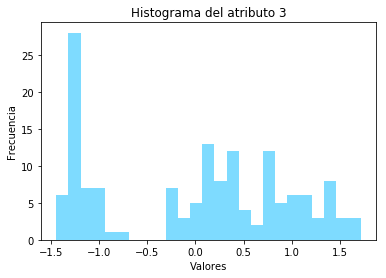

In [15]:
atributo=3
plt.figure()
n, bins, h = plt.hist(Xe[:,atributo], bins=25, histtype='stepfilled')
plt.setp(h, facecolor='#53cfff', alpha=0.75)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma del atributo %d" % atributo)
plt.show()

### Elige dos atributos y los respresenta uno frente a otro

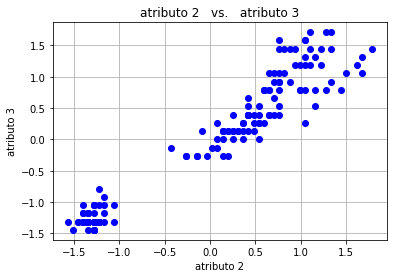

In [16]:
atributos=[2,3]
x1=Xe[:,atributos[0]:atributos[0]+1]
x2=Xe[:,atributos[1]:atributos[1]+1]
plt.plot(x1, x2, 'bo')
plt.xlabel("atributo %d" % atributos[0])
plt.ylabel("atributo %d" % atributos[1])
plt.title('atributo %d   vs.   atributo %d' %(atributos[0],atributos[1]))
plt.grid(True)
plt.show()

### Proyeccion lineal sobre subespacios principales con PCA

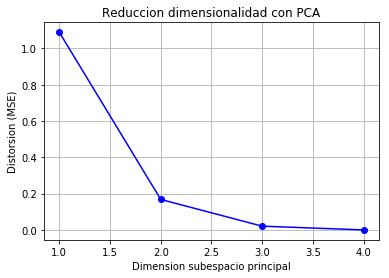

In [17]:
from sklearn import decomposition
# Calcula la distorsion en funcion de la dimension del subespacio principal
J=np.zeros(d,dtype=float) # inicializa
M=np.arange(d) # dimension del subespacio principal
for m in M:
    pca = decomposition.PCA(m+1) 
    pca.fit(Xe)
    Xp=pca.transform(Xe) # proyecta los datos en el subespacio principal
    Xa=pca.inverse_transform(Xp)
    J[m]=np.sum((np.abs(Xe-Xa)**2))/N # MSE entre los datos originales y los datos aproximados
    
plt.plot(M+1,J,'bo-')
plt.ylabel('Distorsion (MSE)')
plt.xlabel('Dimension subespacio principal')
plt.title('Reduccion dimensionalidad con PCA')
plt.grid(True)
plt.show()




# Variable objetivo

### Valor máximo, mínimo, media y varianza de la variable objetivo

In [18]:
maximo_y=y.max()
minimo_y=y.min()
media_y=y.mean()
varianza_y=y.var()
print(' Minimo    Maximos    Media     Varianza')
print('%3.4f   %3.4f   %3.4f   %3.4f' % (minimo_y, maximo_y,media_y,varianza_y))

 Minimo    Maximos    Media     Varianza
0.0000   2.0000   1.0000   0.6667


### Histograma de la variable objetivo

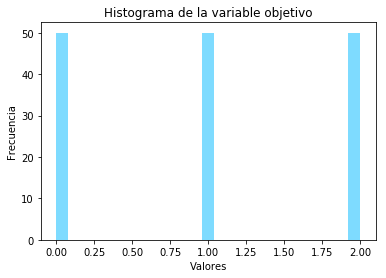

In [19]:
plt.figure()
n, bins, h = plt.hist(y, bins=25, histtype='stepfilled')
plt.setp(h, facecolor='#53cfff', alpha=0.75)
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title('Histograma de la variable objetivo')
plt.show()

La variable objetivo es discreta

### Correlación entre los atributos y la variable objetivo

In [20]:
print('atributo     coef. corr.')
for i in range(d):
    x = Xe[:,i]
    covarianza=np.cov(x,y)
    coeficiente_correlacion=covarianza[0,1]/np.sqrt(y.var()*x.var())
    print('    ',i,'   ',coeficiente_correlacion)

atributo     coef. corr.
     0     0.787813320614
     1     -0.42226127543
     2     0.955411957905
     3     0.962883044096


### Elige un atributo y lo representa frente a la variable objetivo

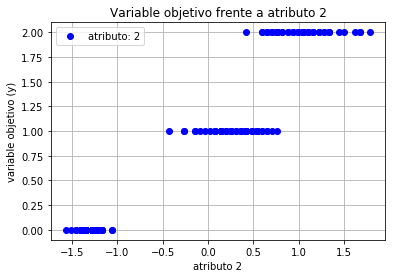

In [21]:
atributo=2
x=Xe[:,atributo]
plt.plot(x, y, 'bo', label="atributo: %d" % atributo)
plt.ylabel('variable objetivo (y)')
plt.xlabel('atributo %d' % atributo)
plt.title('Variable objetivo frente a atributo %d' % atributo)
plt.grid(True)
plt.legend(loc='best')
plt.show()